In [4]:
import numpy as np
import matplotlib.pyplot as plt
#------------------------------------------
def rotateZ(vec,theta):
    #theta in radius
    #vector dim = (2,1)
    vec = vec.reshape((2,1))
    RoatMat = np.array([[np.cos(theta)   ,   -np.sin(theta)   ],
                        [np.sin(theta)   ,    np.cos(theta)   ]])
    RoatMat = RoatMat.reshape((2,2))
    return RoatMat @ vec
#-----------------------------------------

def visualize_grid(grid):
    rows = len(grid)
    cols = len(grid[0])
    # Create a figure and axis
    fig, ax = plt.subplots()
    # Create a heatmap of the grid
    cax = ax.matshow(grid, cmap='viridis')
    # Add colorbar
    plt.colorbar(cax)
    # Set axis labels
    ax.set_xticks(range(0,cols,10))
    ax.set_yticks(range(0,rows,10))
    ax.set_xticklabels(range(-15, 17 ,2 ))
    ax.set_yticklabels(range(-15, 17 ,2 )[::-1])
    
    # Add horizontal and vertical lines
    for i in range(0,rows,20):
        ax.axhline(y=i + 10, color='white', linewidth=0.5)
    for j in range(0,cols,20):
        ax.axvline(x=j + 10, color='white', linewidth=0.5)
    # Show the grid
    plt.show()
 
def coordinateToGridIndex_Scaled_withAnchor(x: float, y: float,dim:int, anchor_x=-15.0, anchor_y=-16.5, scale = 5.0):
    #in:  x,     y, dim
    #out: row, col, msg
    #scaling: a 100X100 map correspond to a region with size (100/scale)X(100/scale) 
    row_max=dim
    col_max=dim
    
    #------scale all---------
    x = x * scale
    y = y * scale
    anchor_x = anchor_x * scale
    anchor_y = anchor_y * scale
    #---------------
    
    x = x-anchor_x
    y = y-anchor_y
    if(x >= row_max or y >= row_max or x < 0 or y < 0):
        print("[Error] index out of range")
        return None,None,-1
    row = round(row_max - 1 - y)
    col = round(x)
    return row,col,1

def girdIndexToCoordinates_Scaled_withAnchor(row:int, col:int, dim:int,anchor_x=-15.0, anchor_y=-16.5, scale=5.0):
    #in: row,  col, dim
    #out: x , y, msg
    
    #-------------Scale the anchor--------
    anchor_x = anchor_x * scale
    anchor_y = anchor_y * scale
    #-------------------------------------
    if(row > dim-1 or col > dim-1 or row < 0 or col < 0):
        print("[Error] index out of range")
        return None,None,-1  
    x = col
    y = dim -1-row 
    
    x=x+anchor_x
    y=y+anchor_y
     
    #-------------Scale back--------------
    x = x/scale
    y = y/scale
    #-------------------------------------
    return x,y,1
def lineToGridIndexList(p1:np.array,p2:np.array, dim:int, step=0.1):
    #out: list of index pair
    v12 = p2-p1
    v12_mag = np.linalg.norm(v12)
    v12_norm =  v12 / np.linalg.norm(v12)
    
    index_list =[]
    i = 0.0
    
    row,col,msg = coordinateToGridIndex_Scaled_withAnchor(p1[0],p1[1],dim)
    if(msg == -1):
        return None, -1
    
    row_prev,col_prev = row,col
    index_list.append(np.array([row,col]))
    print("row:{0} ; col:{1}".format(row,col))
    while(v12_mag >= np.linalg.norm(i * v12_norm) ):
        p = i * v12_norm + p1
        row,col,msg = coordinateToGridIndex_Scaled_withAnchor(p[0],p[1],dim)
        if(msg == -1):
            return None, -1
        i = i+step
        if(row_prev == row and col_prev == col):
            # print("same")
            continue
        else:
            row_prev=row
            col_prev=col
            index_list.append(np.array([row,col]))
            # print("row:{0} ; col:{1}".format(row,col))    
    return index_list,1   

def circleToGridIndexList(center:np.array, radius:float, dim: int,step=0.05):
    d_theta = step/radius # in rad
    print("[d_theta]:{0}".format(d_theta))
    
    
    vec_radial = radius * np.array([1,0])
    index_list = []
    i = 0
    
    p = center + vec_radial
    
    # print(p[0])
    # print(p[1])
    row,col,msg = coordinateToGridIndex_Scaled_withAnchor(p[0],p[1],dim)
    if(msg == -1):
        return None, -1
    
    row_prev,col_prev = row,col
    index_list.append(np.array([row,col]))
    # print("row:{0} ; col:{1}".format(row,col))
    
    while (d_theta * i < 2 * np.pi):
        p = center + rotateZ(vec_radial, d_theta*i).flatten()
        # print("point{0}".format(p))
        row,col,msg = coordinateToGridIndex_Scaled_withAnchor(p.flatten()[0],p.flatten()[1],dim)
        if(msg == -1):
            return None, -1
        i+=1
        if(row_prev == row and col_prev == col):
            # print("same")
            continue
        else:
            row_prev=row
            col_prev=col
            # print(np.array([row,col]))
            index_list.append(np.array([row,col]))   
    
    return index_list,1  
    
     
def fillGirdWithIndex(index_list,grid):
    for indexPair in index_list:
        row=indexPair[0]
        col=indexPair[1]
        if(grid[row][col]==0):
            grid[row][col]=1
            # print("fill row{0} col{1} num{2}".format(row,col,1))
        elif(grid[row][col]==1):
            grid[row][col]=1
            #Collide!!
            # print("fill row{0} col{1} num{2}".format(row,col,2))
    return grid

Test coordinate To Grid and Grid index to coordinates With Scaling

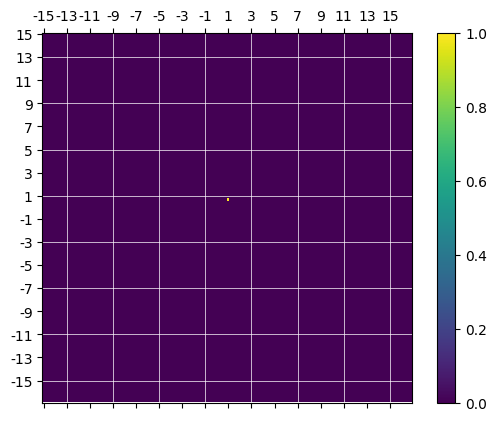

x:1.0;y:0.9


In [5]:
dim=160
row_max=dim
col_max=dim
grid = np.zeros((row_max,col_max))

x = 1.0
y = 1.0

#coordinate to the grid index
#With scaling of 10 , a map with 300X300 dim cooresponding to a region of 30X30
row,col,msg = coordinateToGridIndex_Scaled_withAnchor(x,y,dim,anchor_x=-15.0,anchor_y=-16.5,scale=5.0)
grid[row][col]=1
visualize_grid(grid)

#grid index to coordinates
x,y,msg = girdIndexToCoordinates_Scaled_withAnchor(row, col, dim,anchor_x=-15.0,anchor_y=-16.5,scale=5.0)
print("x:{0};y:{1}".format(x,y))

Test Line/Circle to Grid Index List and fill Grid with index 

row:72 ; col:80


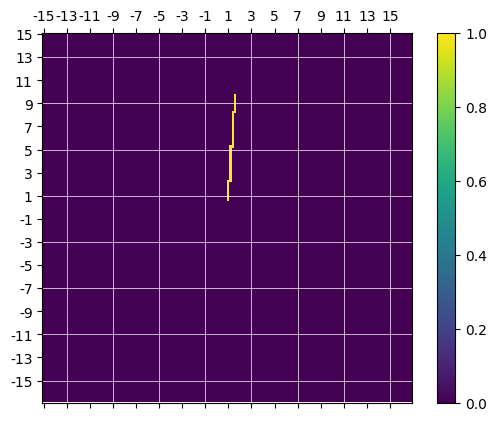

row:72 ; col:75


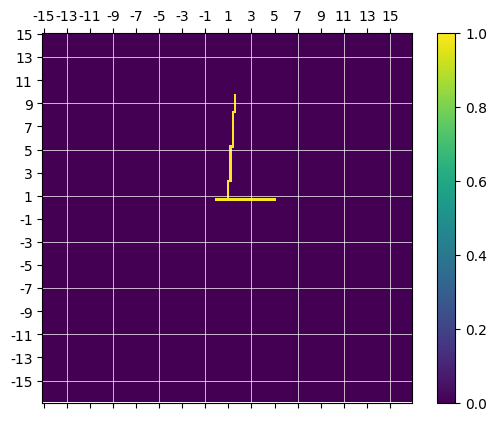

[d_theta]:0.0125


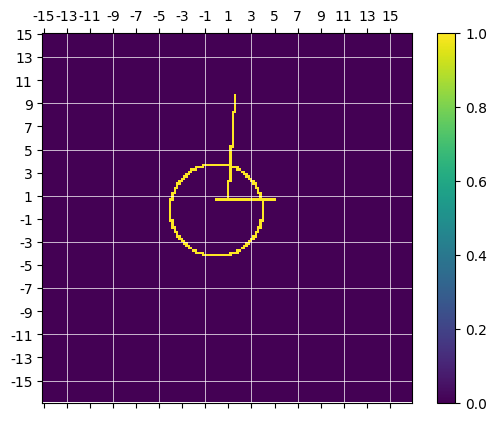

In [6]:
grid = np.zeros((row_max,col_max))
p1 = np.array([1,1])
p2 = np.array([1.6,10])
index_list, msg = lineToGridIndexList(p1,p2, dim=dim)
# print(index_list)
grid = fillGirdWithIndex(index_list,grid)
visualize_grid(grid)

p1 = np.array([0,1])
p2 = np.array([5,1])
index_list, msg = lineToGridIndexList(p1,p2, dim=dim)
# print(index_list)
grid = fillGirdWithIndex(index_list,grid)
visualize_grid(grid)

center = np.array([0,0])
radius = 4
index_list, msg = circleToGridIndexList(center, radius, dim=dim)
grid = fillGirdWithIndex(index_list,grid)
visualize_grid(grid)

In [7]:
from shapely import STRtree
from shapely import box
from shapely.geometry.base import BaseGeometry
from shapely import LinearRing
from shapely import LineString 
from shapely import Point 
from shapely import Polygon 

def fillShapylyGeo(geo:BaseGeometry, grid):
    dim=grid.shape[0]
    print("dim={0}".format(dim))
    if(type(geo)==Point):
        row,col,msg=coordinateToGridIndex_Scaled_withAnchor(geo.x,geo.y,dim)
        if(msg==-1):
            print("[ERROR][coordinateToGridIndex]")
            return None,-1
        grid[row][col]=1
        return grid,1
    
    if(type(geo)==LineString):
        p_s = np.array(geo.coords[0])

        p_prev = p_s
        for coord in geo.coords:
            p = np.array(coord)
            if(p[0] == p_prev[0] and p[1] == p_prev[1]):
                continue
            
            index_list, msg = lineToGridIndexList(p_prev,p, dim=dim)
            if(msg==-1):
                print("[ERROR][lineToGridIndexList]")
                return None,-1            
            grid = fillGirdWithIndex(index_list,grid)  
            p_prev=p
        
    if(type(geo)==Polygon): 
        
        p_s = np.array(geo.exterior.coords[0])
        p_e = np.array(geo.exterior.coords[-1])
        p_prev = p_s
        for coord in geo.exterior.coords:
            p = np.array(coord)
            if(p[0] == p_prev[0] and p[1] == p_prev[1]):
                continue
            
            index_list, msg = lineToGridIndexList(p_prev,p, dim=dim)
            if(msg==-1):
                print("[ERROR][lineToGridIndexList]")
                return None,-1            
            grid = fillGirdWithIndex(index_list,grid)
            
            p_prev=p
        
        #close the end point and starting point
        index_list, msg = lineToGridIndexList(p_e,p_s, dim=dim)
        if(msg==-1):
            print("[ERROR][lineToGridIndexList]")
            return None,-1            
        grid = fillGirdWithIndex(index_list,grid)
        return grid,1
    if(type(geo)==LinearRing):
        p_s = np.array(geo.coords[0])
        p_e = np.array(geo.coords[-1])
        p_prev = p_s
        for coord in geo.coords:
            p = np.array(coord)
            if(p[0] == p_prev[0] and p[1] == p_prev[1]):
                continue
            
            index_list, msg = lineToGridIndexList(p_prev,p, dim=dim)
            if(msg==-1):
                print("[ERROR][lineToGridIndexList]")
                return None,-1            
            grid = fillGirdWithIndex(index_list,grid)
            
            p_prev=p
        
        #close the end point and starting point
        index_list, msg = lineToGridIndexList(p_e,p_s, dim=dim)
        if(msg==-1):
            print("[ERROR][lineToGridIndexList]")
            return None,-1            
        grid = fillGirdWithIndex(index_list,grid)
        return grid,1
        

Test fillShapelyGeo

dim=160
row:76 ; col:75
row:76 ; col:80
row:72 ; col:80


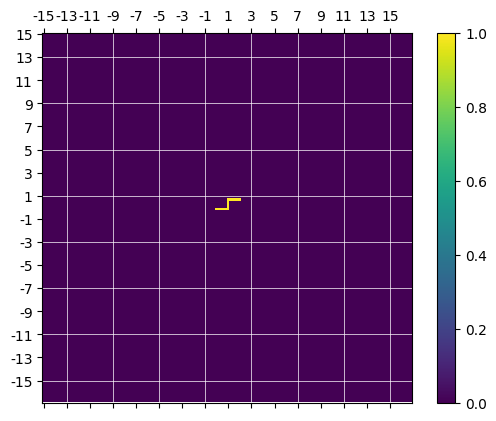

dim=160
row:76 ; col:75
row:66 ; col:75
row:72 ; col:80
row:76 ; col:80
row:76 ; col:75


/tmp/ipykernel_74236/4191705446.py:86: RuntimeWarning: invalid value encountered in divide
  v12_norm =  v12 / np.linalg.norm(v12)


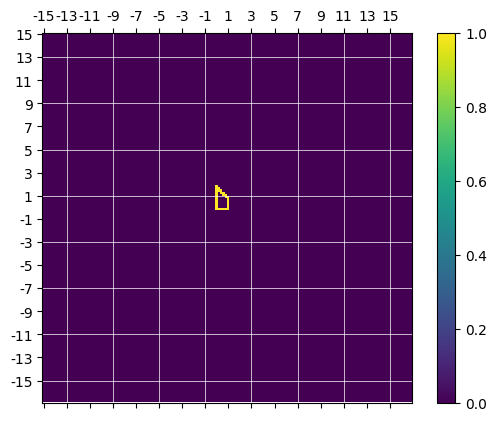

In [8]:
#lineString
grid = np.zeros((row_max,col_max))
lineS = LineString([[0, 0], [1, 0], [1, 1], [2,1]])
fillShapylyGeo(lineS,grid)
visualize_grid(grid)

#polygon
grid = np.zeros((row_max,col_max))
coords = ((0., 0.), (0., 2.), (1., 1.), (1., 0.), (0., 0.))
polygon = Polygon(coords)
fillShapylyGeo(polygon.exterior,grid)
visualize_grid(grid)

In [9]:
def vecToAngle(vec):
    if vec[0] == 0:
        if vec[1] > 0:
            return np.pi / 2
        if vec[1] < 0:
            return np.pi * (3 / 2)
    if vec[1] == 0:
        if vec[0] > 0:
            return 0
        if vec[0] < 0:
            return np.pi
    theta = np.arctan2(vec[1], vec[0])
    return theta

In [13]:
plan = [(1,1),(2,2),(3,3)]
print(plan)
plan.remove((1,1))
print(plan)
print(len(plan))

[(1, 1), (2, 2), (3, 3)]
[(2, 2), (3, 3)]
2
